### 피마인디언 당뇨병 예측
* 보통 당뇨병의 원인은 식습관, 유전으로 꼽음
* 고립된 지역인 피마 지역의 인디언들은 고유의 혈통이 지속되어 왔지만,
* 20세기 후반 강제 이주정책으로 인해 서구화된 식습관으로 많은 당뇨병 환자가 생겨남

### diabetes 테이터 셋 구조
* 임신횟수, 포도당부하검사, 혈압, 삼두근피하지방측정값, 인슐린농도, 
* 비만지수, 당뇨내력가중치, 나이, 5년내 당뇨발병여부(0:음성)
* pregnant, glucose, blood, thickness, insulin, bmi, pedigree, age, diabete

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [5]:
# 데이터가 이상해서 다음에 혼자 해보셈~
# from sklearn.datasets import load_diabetes

# diabetes = load_diabetes()
# print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [13]:
pima = pd.read_csv('./data/pima-indian.csv', header=None, names=['pregnant', 'glucose', 'blood', 'thickness', 'insulin', 'bmi', 'pedigree', 'age', 'diabete'])
pima.head()

,pregnant,glucose,blood,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# 결측치가 없넹~
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   blood      768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabete    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
pima.diabete.value_counts()

diabete
0    500
1    268
Name: count, dtype: int64

In [26]:
data = pima.iloc[:, :8]
target = pima.diabete
X_train, X_test, y_train, y_test= train_test_split(data, target, train_size=0.7,
                random_state=2309231635, stratify=target)

In [27]:
lrclf = LogisticRegression(max_iter=500)

lrclf.fit(X_train, y_train)
pred = lrclf.predict(X_test)
accuracy_score(y_test, pred)

0.8138528138528138

In [28]:
confusion_matrix(y_test, pred)

array([[141,   9],
       [ 34,  47]])

In [29]:
# 정밀도
precision_score(y_test, pred)

0.8392857142857143

In [30]:
# 재현율
recall_score(y_test, pred)

0.5802469135802469

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [34]:
pred_proba = lrclf.predict_proba(X_test)
fprs, tprs, thresholds = roc_curve(y_test, pred_proba[:, 1])

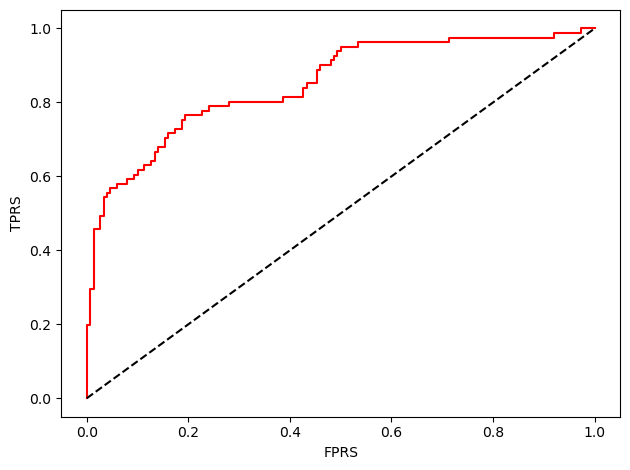

In [35]:
plt.plot(fprs, tprs, 'r')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('FPRS')
plt.ylabel('TPRS')
plt.tight_layout()

In [36]:
import seaborn as sns

In [37]:
roc = pd.DataFrame()

roc['fprs'] = fprs
roc['tprs'] = tprs
roc['thresholds'] = thresholds

roc.head()

,fprs,tprs,thresholds
0,0.000000,0.000000,1.955114
1,0.000000,0.012346,0.955114
2,0.000000,0.197531,0.821038
3,0.006667,0.197531,0.816741
4,0.006667,0.296296,0.744559


/opt/conda/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_3216/3253261754.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


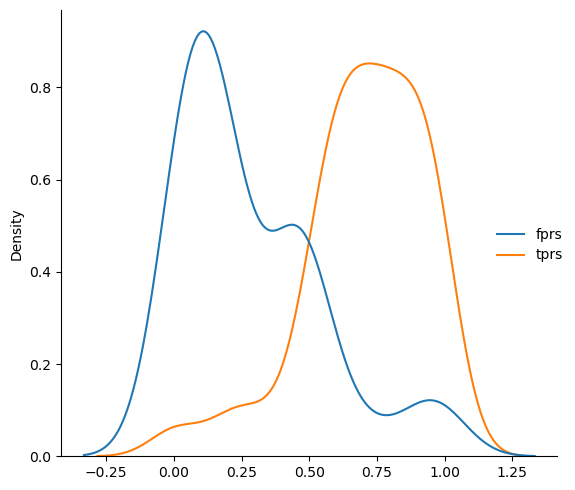

In [38]:
sns.displot(roc.iloc[:, [0,1]], kind='kde')
plt.tight_layout()

In [40]:
optidx = np.argmax(tprs - fprs)
thresholds[optidx]

0.3160169372399655

In [39]:
roc_auc_score(y_test, pred)

0.7601234567901234